# Implicit Methods: Adams-Moulton

% TO DO

% - Complete {prf:ref}`ode-ivp-7-2` of solving a stiff linear system, compared to solving with the same-degree Runge-Kutta method.

% - Change the stiff examples to using the damped mass-spring with $K = D $ and $M \ll 1$ (near the singular perturbation limit.)

**References:**

- Section 6.7 *Multistep Methods* in {cite}`Sauer`.
- Section 5.6 *Multistep Methods* in {cite}`Burden-Faires`.

## Introduction

So far, most methods we have seen give the new approximation value with an explicit formula for it in terms of previous and so already known) values;
the general **explicit s-step method** seen in
{doc}`ODE-IVP-7-multi-step-methods-Adams-Bashforth`
was

$$U_{i} = \phi(U_{i-1}, \dots U_{i-s+}, h), \quad s > 1$$

However, we briefly saw two **implict methods** back in {doc}`ODE-IVP-2-Runge-Kutta`,
in the process of deriving the explicit trapezoid and explicit midpoint methods:
the **Implicit Trapezoid Method** (or just the **Trapezoid Method**, as this is the real thing, before the further approximations were used to get an explicit formula)

$$U_{i+1} = U_i + h \frac{f(t_i, U_i) + f(t_{i+1}, U_{i+1}))}{2}$$

and the **Implicit Midpoint Method**

$$U_{i+1} = U_i + h f\left( t + h/2, \frac{U_i + U_{i+1}}{2} \right)$$

These are clearly not as simple to work with as explicit methods, but the equation solving can often be done.
In particular for linear differential equations, these give linear equations for the unknown $U_{i+1}$, so even for systems,
they can be solved by the method seen earlier in these notes.

Another strategy is noting that these are fixed point equations, so that fixed point iteration can be used.
The factor $h$ at right helps; it can be shown that for small enough $h$ (how small depends on the function $f$),
these are contraction mappings and so fixed point iteration works.

This idea can be combined with linear multistep methods, and one important case is modifying the Adams-Bashforth method by allowing
$F_i = f(t_i, U_i)$ to appear at right: this gives the Adams-Moulton form

$$U_{i} = U_{i-1} + h (b_0 f(t_{i-s}, U_{i-s}) + \dots + b_{s} f(t_{i}, U_{i}))$$

where the only change from Adams-Bashforth methods is that $f(t_{i}, U_{i})$ term.

The coefficients can be derived much as for Adams-Bashforth methods, by the method of undetermined coefficients;
one valuable difference is that there at now $s+1$ undetermined coefficients, so all error terms up to $O(h^s)$ can be cancelled
and the error made $O(h^{s+1})$: one degree higher.

The $s=1$ case is familiar:

$$U_{i} = U_{i-1} + h (b_0 f(t_{i-1}, U_{i-1}) + b_{1} f(t_{i}, U_{i}))$$

and as symmetry suggests, the solution is $b_0 = b_1 = 1/2$, giving

$$U_{i} = U_{i-1} + h \frac{f(t_{i-1}, U_{i-1}) + f(t_{i}, U_{i})}{2}$$

which is the (implicit) trapzoid rule in the new shifted indexing.

This is much used for numerical solution of partial differential equations of evoluton type (after first approximating by a large system of ordinary differnetial equations).
In that context it is often known as the **Crank-Nicholson method**.

We can actually start at $s=0$; the first few Adams-Moulton methods are:

\begin{align*}
s = 0: b_0 &= 1
\\
 &U_{i} - h f(t_i, U_i)) = U_{i-1} \qquad &\text{The backward Euler method}
\\
s = 1: b_0 &= b_1 = 1/2
\\
 &U_{i} - \frac{h}{2} f(t_i, U_i) = U_{i-1} + \frac{h}{2} (F_{i-1} ) \qquad &\text{The (implicit) trapezoid method}
\\
s = 2: b_0 &= -1/12, b_1 = 8/12, b_2 = 5/12
\\
&U_{i} - \frac{5h}{12}f(t_i, U_i) = U_{i-1} + \frac{h}{12} (-F_{i-2} + 8 F_{i-1})
\\
s = 3: b_0 &= 1/24, b_1 = -5/24, b_2 = 19/24, b_3 = 9/24
\\
&U_{i} - \frac{9h}{24}f(t_i, U_i) = U_{i-1} + \frac{h}{24}(F_{i-3} -5F_{i-2} + 19F_{i-1})
\end{align*}

The use of $F_{i-k}$ notation emphasizes that these earlier values of $F_{i-k} = f(t_{i-k}, U_{i-k})$ are known from a previous step,
so can be stored for reuse.

The backward Euler method has not been mentioned before; it comes from using the backward counterpart of the forward difference approximation of the derivative:

$$u'(t) \approx \frac{u(t) - u(t-h)}{h}$$

Like Euler's method it is only first order accurate, but it has excellent *stability* properties, which makes it useful in some situations.

```{prf:example} An equation with fast and slow time scales

The equation

$$ y'' + 101 y' + 100y = 0, \quad y(0) = y_0, y'(0) = v_0 $$

has the general solution

$$ y(t) = A e^{-t} + B e^{-100t} $$

With explicit methods, the time-step size has to be smal enought to resove the fast time scale, so $h$ of order $1/100$,
but the second term decays very rapdly, and with some equations like this it is enough to resolve the dominant behavior of the $e^{-t}$ term,
which some implict method can resolve with far larger step sizes.

Let us compare how this is handled by the implicit trapezoid and explicit trapezoid methods.
```

The system form is

$$
\frac{d}{dt} \left[\begin{array}{c} u_1 \\ u_2 \end{array}\right] =
\left[\begin{array}{cc} 0 & 1 \\ -100 & -101 \end{array}\right] \left[\begin{array}{c} u_1 \\ u_2 \end{array}\right]
$$

The trapezoid method is thus

$$
U_i - \frac{h}{2}\left[\begin{array}{cc} 0 & 1 \\ -100 & -101 \end{array}\right] U_i =
U_{i-1} + \frac{h}{2}\left[\begin{array}{cc} 0 & 1 \\ -100 & -101 \end{array}\right]
$$

or

$$
\left[\begin{array}{cc} 1 & -h/2 \\ 50h & 1 + 101h/2 \end{array}\right] U_i
=
\left[\begin{array}{cc} 1 & h/2 \\ -50h & 1 - 101h/2 \end{array}\right] U_{i-1}
$$

In [1]:
using PyPlot

In [2]:
include("NumericalMethods.jl")
using .NumericalMethods: explicittrapezoid_system, approx3

In [3]:
function f_fast_slow(t, u)
    return [u[2], -K*u[1] - (K+1)*u[2]]
end;

In [4]:
function y_fast_slow(t; t_0, y_0, v_0, K)
    B = -(y_0 + v_0)/(K-1)
    A = y_0 - B
    return A*exp(-(t-t_0)) + B*exp(-K*(t-t_0))
end;

In [5]:
K = 100.0
y_0 = 1.0
v_0 = 0.0
u_0 = [y_0; v_0]
a = 0.0
b = 0.5;

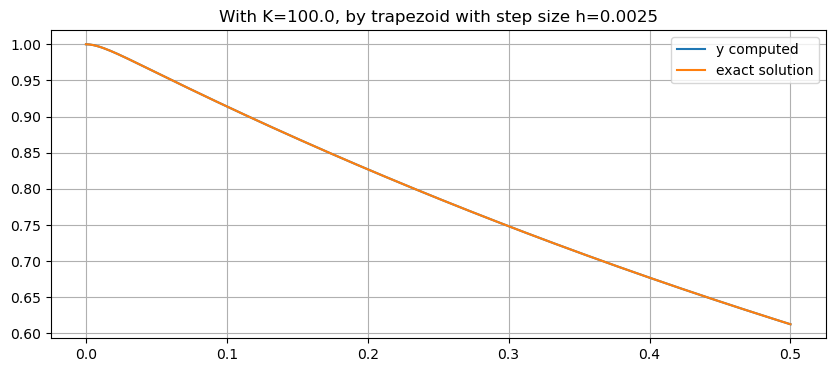

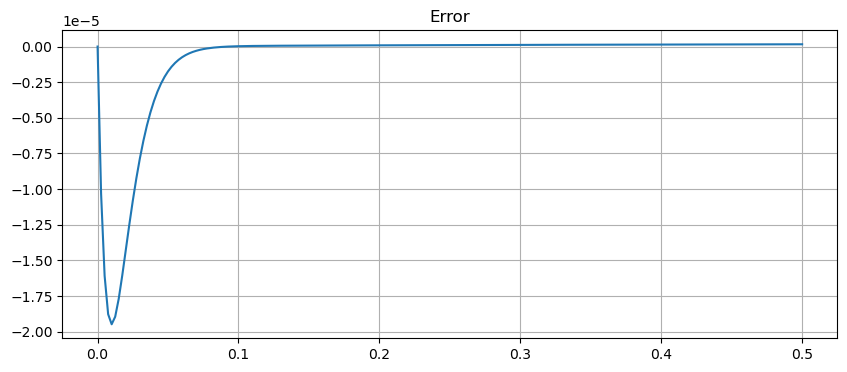

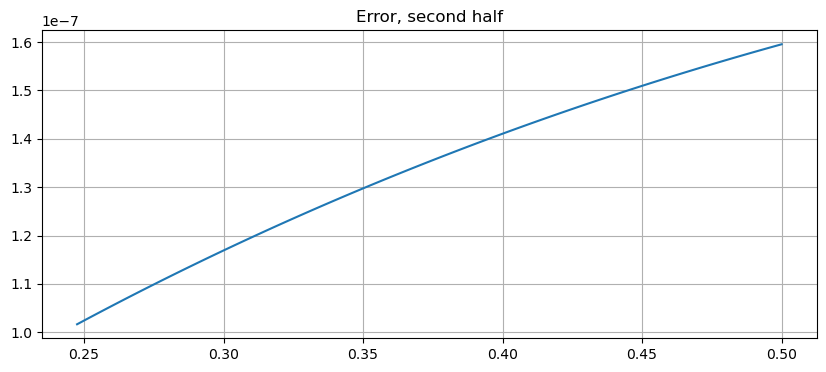

In [6]:
n = 200  # explicit trapezoid works
#n = 50  # explicit trapezoid works, barely

h = (b-a)/n
t = range(a, b, n+1)
M = [(1)   (-h/2);
     (50h) (1 + 101h/2)]
N = [(1)    (h/2);
     (-50h) (1 - 101h/2)]
U = zeros(n+1, 2)
U[1,:] = u_0
for i in 1:n
    U[i+1,:] = M\(N*U[i,:])
end

Y = U[:,1]
y = y_fast_slow.(t, t_0 = 0.0, y_0=y_0, v_0=v_0, K=K)
figure(figsize=[10,3])
title("With K=$K, by trapezoid with step size h=$(approx3(h))")
plot(t, Y, label="y computed")
plot(t, y, label="exact solution")
legend()
grid(true)

Yerror = y-Y
figure(figsize=[10,3])
title("Error")
plot(t, Yerror)
grid(true)

n_middle = n ÷ 2
figure(figsize=[10,3])
title("Error, second half")
plot(t[n_middle:end], Yerror[n_middle:end])
grid(true)

### Compare to the explicit trapezoid method

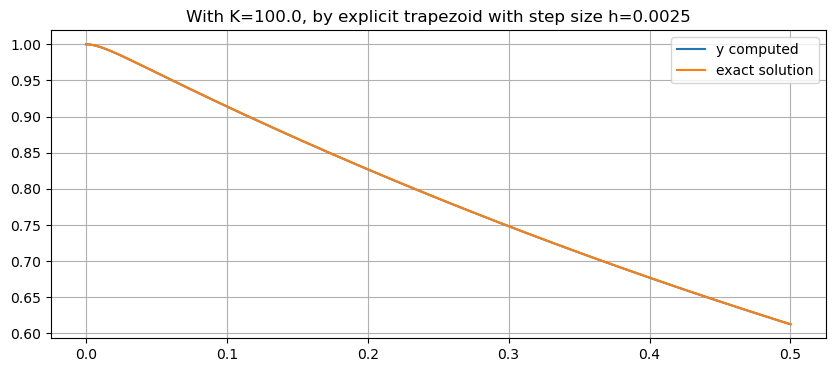

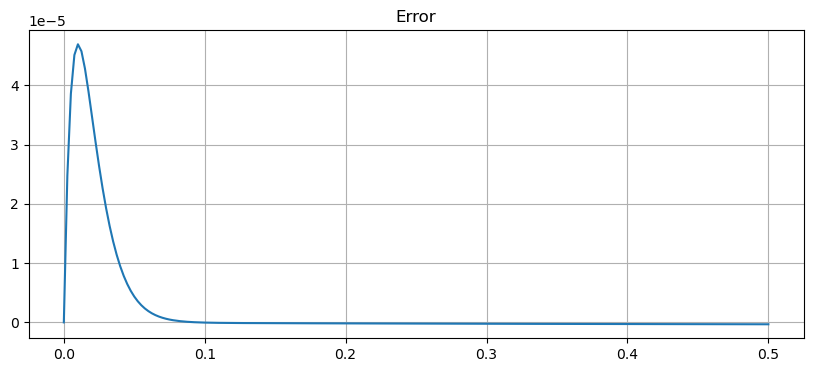

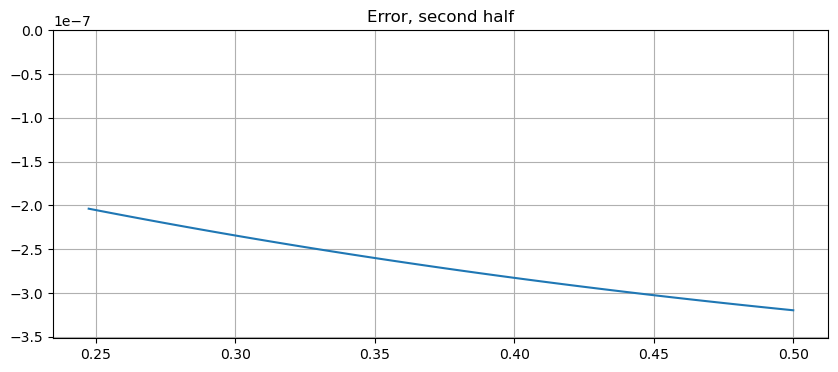

In [7]:
(t_ET, U) = explicittrapezoid_system(f_fast_slow, a, b, u_0, n)
Y = U[:,1]
y = y_fast_slow.(t, t_0 = 0.0, y_0=y_0, v_0=v_0, K=K)

figure(figsize=[10,3])
title("With K=$K, by explicit trapezoid with step size h=$(approx3(h))")

plot(t, Y, label="y computed")
plot(t, y, label="exact solution")
legend()
grid(true)

yerror = y-Y
figure(figsize=[10,3])
title("Error")
plot(t, yerror)
grid(true)

n_middle = n ÷ 2
t_secondhalf = t[n_middle:end]
yerror_secondhalf = yerror[n_middle:end]
yerrormin = minimum([minimum(yerror_secondhalf), 0.0])*1.1
yerrormax = maximum([maximum(yerror_secondhalf), 0.0])*1.1

figure(figsize=[10,3])
title("Error, second half")
ylim(yerrormin, yerrormax)
plot(t_secondhalf, yerror_secondhalf)
grid(true)

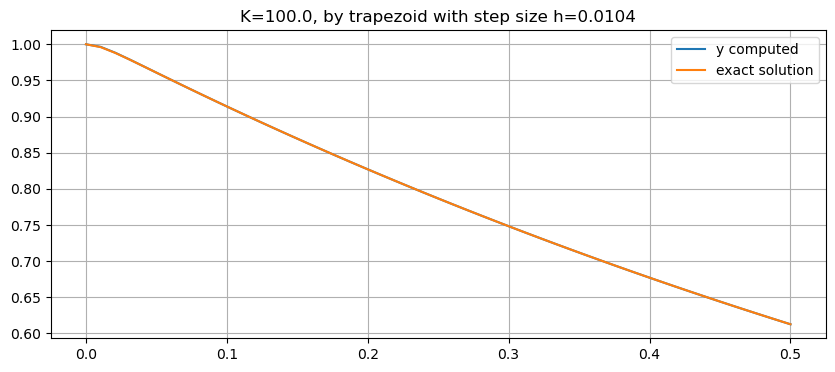

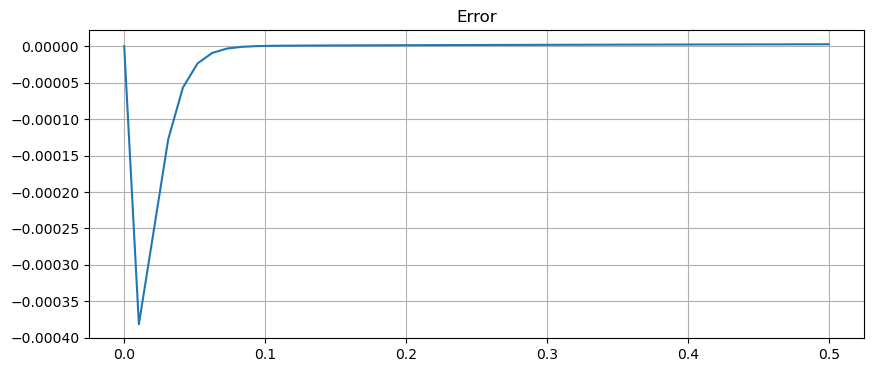

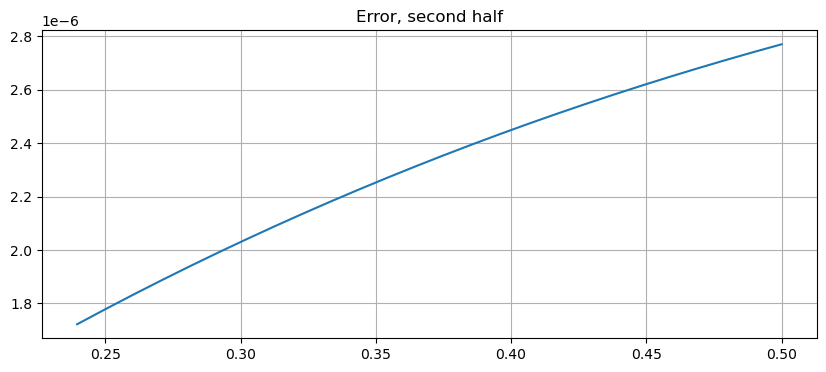

In [8]:
n = 48  # explicit trapezoid fails

h = (b-a)/n
t = range(a, b, n+1)
M = [(1)   (-h/2);
     (50h) (1 + 101h/2)]
N = [(1)    (h/2);
     (-50h) (1 - 101h/2)]
U = zeros(n+1, 2)
U[1,:] = u_0
for i in 1:n
    U[i+1,:] = M\(N*U[i,:])
end

Y = U[:,1]
y = y_fast_slow.(t, t_0 = 0.0, y_0=y_0, v_0=v_0, K=K)

figure(figsize=[10,3])
title("K=$K, by trapezoid with step size h=$(approx3(h))")
plot(t, Y, label="y computed")
plot(t, y, label="exact solution")
legend()
grid(true)

Yerror = y-Y
figure(figsize=[10,3])
title("Error")
plot(t, Yerror)
grid(true)

n_middle = n ÷ 2
figure(figsize=[10,3])
title("Error, second half")
plot(t[n_middle:end], Yerror[n_middle:end])
grid(true)

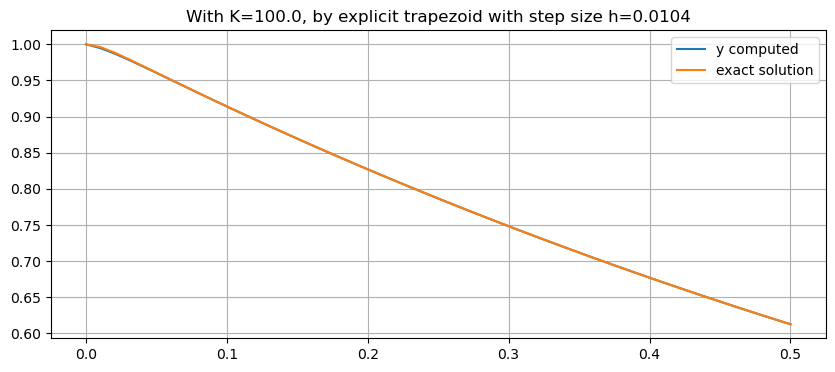

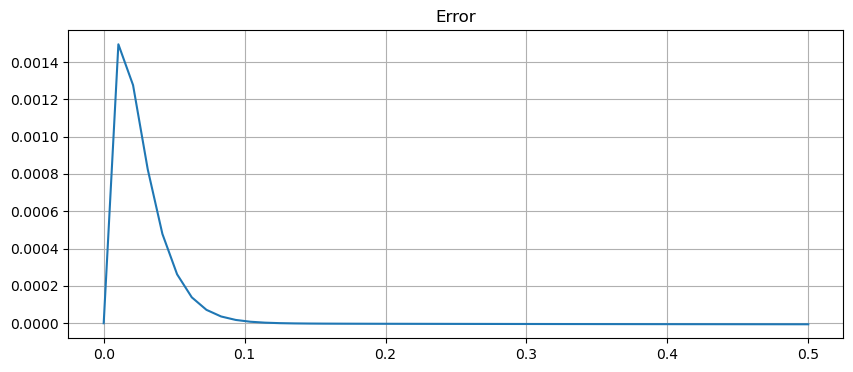

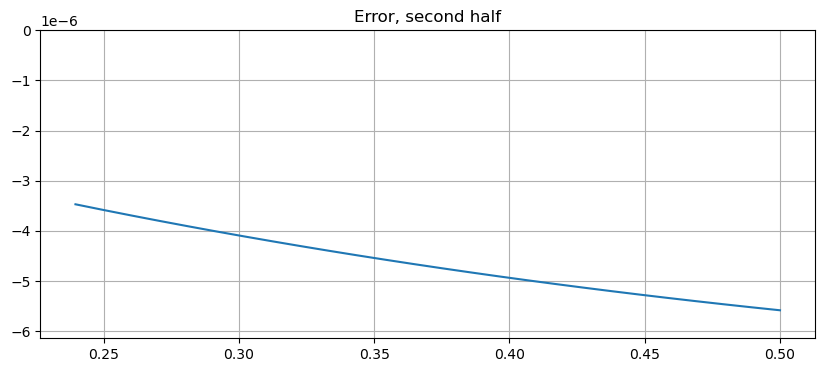

In [9]:
(t_ET, U) = explicittrapezoid_system(f_fast_slow, a, b, u_0, n)
Y = U[:,1]
y = y_fast_slow.(t, t_0 = 0.0, y_0=y_0, v_0=v_0, K=K)

figure(figsize=[10,3])
title("With K=$K, by explicit trapezoid with step size h=$(approx3(h))")
plot(t, Y, label="y computed")
plot(t, y, label="exact solution")
legend()
grid(true)

yerror = y-Y
figure(figsize=[10,3])
title("Error")
plot(t, yerror)
grid(true)

n_middle = n ÷ 2
t_secondhalf = t[n_middle:end]
yerror_secondhalf = yerror[n_middle:end]
yerrormin = minimum([minimum(yerror_secondhalf), 0.0])*1.1
yerrormax = maximum([maximum(yerror_secondhalf), 0.0])*1.1

figure(figsize=[10,3])
title("Error, second half")
ylim(yerrormin, yerrormax)
plot(t_secondhalf, yerror_secondhalf)
grid(true)

```{prf:example} Comparing 4th order methods: Adams-Moulton vs Runge-Kutta (coming soon)
:label: ode-ivp-7-2

Implementing the $s=3$ case above, which is fourth order accurate, and compare it to the classical Runge-Kutta method {prf:ref}`runge-kutta`.
```

Rather than implementing any of these in general, the next section introduces a strategy for converting these to explicit methods,
much as in section {doc}`ODE-IVP-2-Runge-Kutta`
Euler's method (Adams-Bashforth $s=1$) was combined with the trapezoid method (Adams-Moulton $s=1$) to get the explicit trapozoid method:
an explicit method with the same order of accuracy as the latter of this pair.

## Exercises
Coming soon.